### 问题三：

建立辛烷值（RON）损失预测模型：采用上述样本和建模主要变量，通过数据挖掘技术建立辛烷值（RON）损失预测模型，并进行模型验证。

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.model_selection import train_test_split  # 这里是引用了交叉验证
from sklearn.metrics.regression import mean_squared_error, r2_score

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%store -r samples_data
# cluster 1st
%store -r model_features_1st
%store -r produc_features_1st
%store -r weight_1st
# cluster 2nd
%store -r model_features_2nd
%store -r produc_features_2nd
%store -r weight_2nd
# cluster 3rd
%store -r model_features_3rd
%store -r produc_features_3rd
%store -r weight_3rd

In [3]:
model_features_1st.keys()

MultiIndex([(  'S-ZORB.TE_5102.PV',            '干气出装置温度'),
            ('S-ZORB.FT_3501.DACA',       '循环氢至闭锁料斗料腿流量'),
            ('S-ZORB.LC_3301.DACA',         'D123冷凝水罐液位'),
            (  'S-ZORB.PT_9001.PV',           '燃料气进装置压力'),
            (  'S-ZORB.FT_9401.PV',           '净化风进装置流量'),
            (  'S-ZORB.FC_1005.PV',            '原料泵出口流量'),
            (  'S-ZORB.TE_9301.PV',      '1.0MPa蒸汽进装置温度'),
            (               '原料性质',             '辛烷值RON'),
            (                 '时间', 'Unnamed: 1_level_1')],
           )

In [4]:
model_features_2nd.keys()

MultiIndex([(   'S-ZORB.CAL_H2.PV',                '氢油比'),
            (  'S-ZORB.FT_9001.PV',           '燃料气进装置流量'),
            (  'S-ZORB.TE_9301.PV',      '1.0MPa蒸汽进装置温度'),
            ('S-ZORB.LT_1002.DACA',         'D-101脱水包液位'),
            (  'S-ZORB.TC_2607.PV',              '再生器温度'),
            (  'S-ZORB.TC_5005.PV',            '稳定塔下部温度'),
            ('S-ZORB.LC_3301.DACA',         'D123冷凝水罐液位'),
            (               '原料性质',             '辛烷值RON'),
            (                 '时间', 'Unnamed: 1_level_1')],
           )

In [5]:
model_features_3rd.keys()

MultiIndex([(  'S-ZORB.PC_5101.PV',             '稳定塔顶压力'),
            (  'S-ZORB.TC_2101.PV',             '反吹氢气温度'),
            (  'S-ZORB.PT_9402.PV',          '非净化风进装置压力'),
            (  'S-ZORB.TE_2103.PV',            '反应器上部温度'),
            (   'S-ZORB.CAL_H2.PV',                '氢油比'),
            ('S-ZORB.LT_2901.DACA',         'D-109吸附剂料位'),
            ('S-ZORB.LT_9001.DACA',          'D-203底部液位'),
            ('S-ZORB.LT_1002.DACA',         'D-101脱水包液位'),
            (               '原料性质',             '辛烷值RON'),
            (                 '时间', 'Unnamed: 1_level_1')],
           )

## 对于 类别-1 进行线性回归建模

In [6]:
# 构建训练集和测试集 cluster 1st
X = model_features_1st
y = produc_features_1st[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(93, 9)
y_train.shape=(93, 1)
X_test.shape=(31, 9)
y_test.shape=(31, 1)


In [7]:
# 简单线性回归
# Applying LinearRegression
model_1st = LinearRegression()
model_1st.fit(X_train, y_train)
y_train_pred = model_1st.predict(X_train)
y_test_pred = model_1st.predict(X_test)
y_pred = model_1st.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred), r2_score(y, y_pred)))

MSE train:0.929, test:0.526, whole:0.828
R^2 train:0.053, test:0.051, whole:0.053


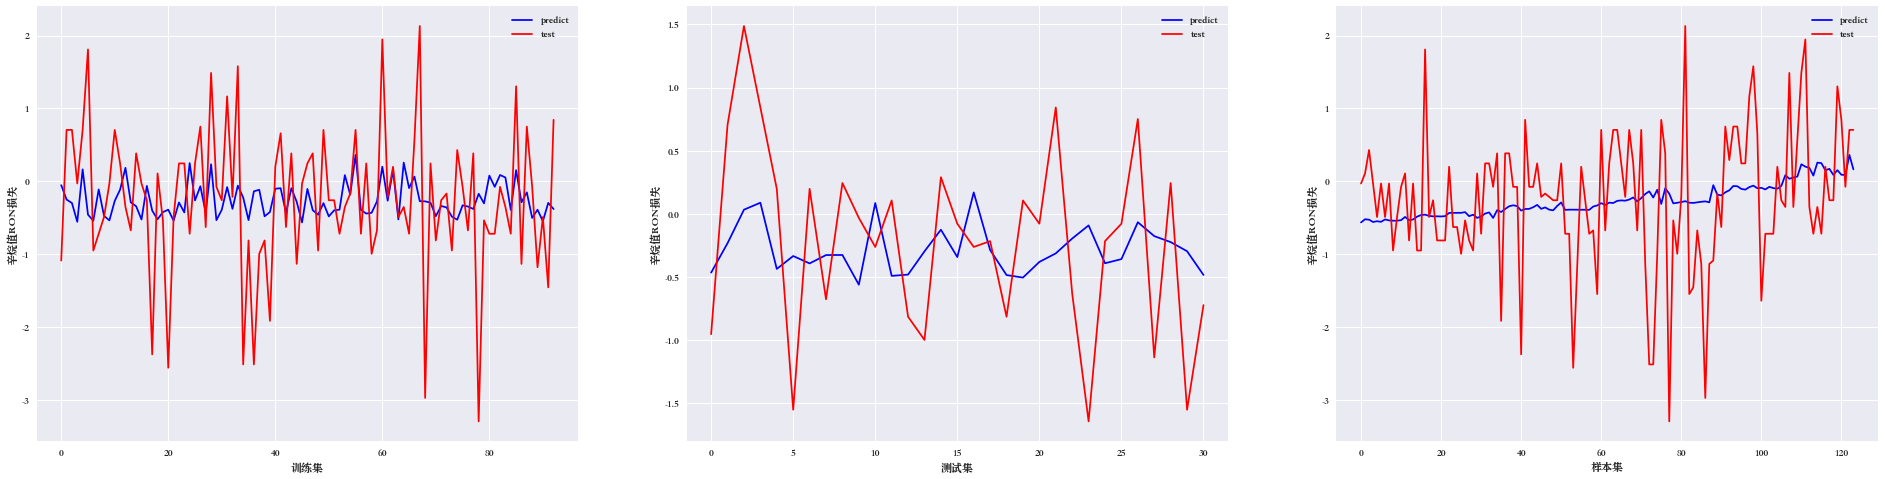

In [8]:
plt.figure(figsize = (33, 8))
plt.subplot(131)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(132)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(133)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 对于 类别-2 进行线性回归建模

In [9]:
# 构建训练集和测试集 cluster 2nd
X = model_features_2nd
y = produc_features_2nd[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(69, 9)
y_train.shape=(69, 1)
X_test.shape=(24, 9)
y_test.shape=(24, 1)


In [10]:
# 简单线性回归
# Applying LinearRegression
model_2nd = LinearRegression()
model_2nd.fit(X_train, y_train)
y_train_pred = model_2nd.predict(X_train)
y_test_pred = model_2nd.predict(X_test)
y_pred = model_2nd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred), r2_score(y, y_pred)))

MSE train:0.349, test:0.320, whole:0.341
R^2 train:0.088, test:-0.345, whole:0.036


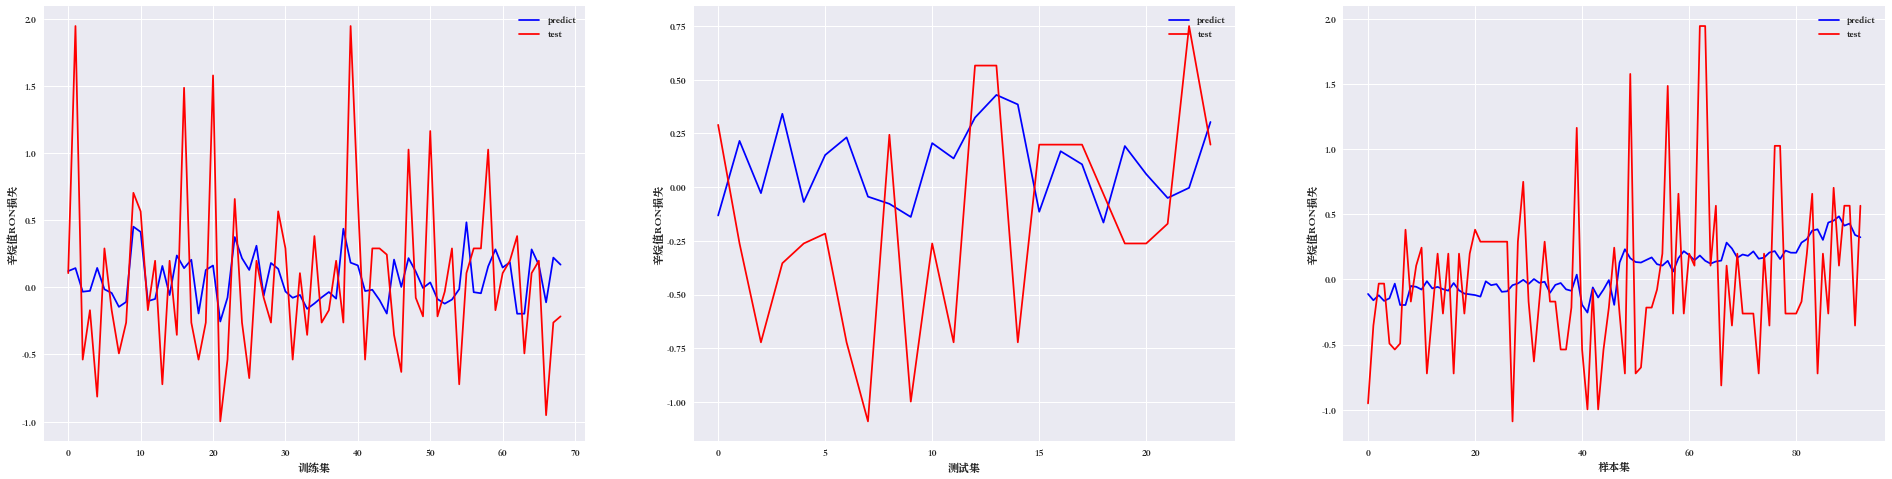

In [11]:
plt.figure(figsize = (33, 8))
plt.subplot(131)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(132)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(133)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 对于 类别-3 进行线性回归建模

In [12]:
# 构建训练集和测试集 cluster 3rd
X = model_features_3rd
y = produc_features_3rd[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(51, 10)
y_train.shape=(51, 1)
X_test.shape=(18, 10)
y_test.shape=(18, 1)


In [13]:
# 简单线性回归
# Applying LinearRegression
model_3rd = LinearRegression()
model_3rd.fit(X_train, y_train)
y_train_pred = model_3rd.predict(X_train)
y_test_pred = model_3rd.predict(X_test)
y_pred = model_3rd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred), r2_score(y, y_pred)))

MSE train:1.112, test:2.821, whole:1.558
R^2 train:0.097, test:-0.046, whole:0.122


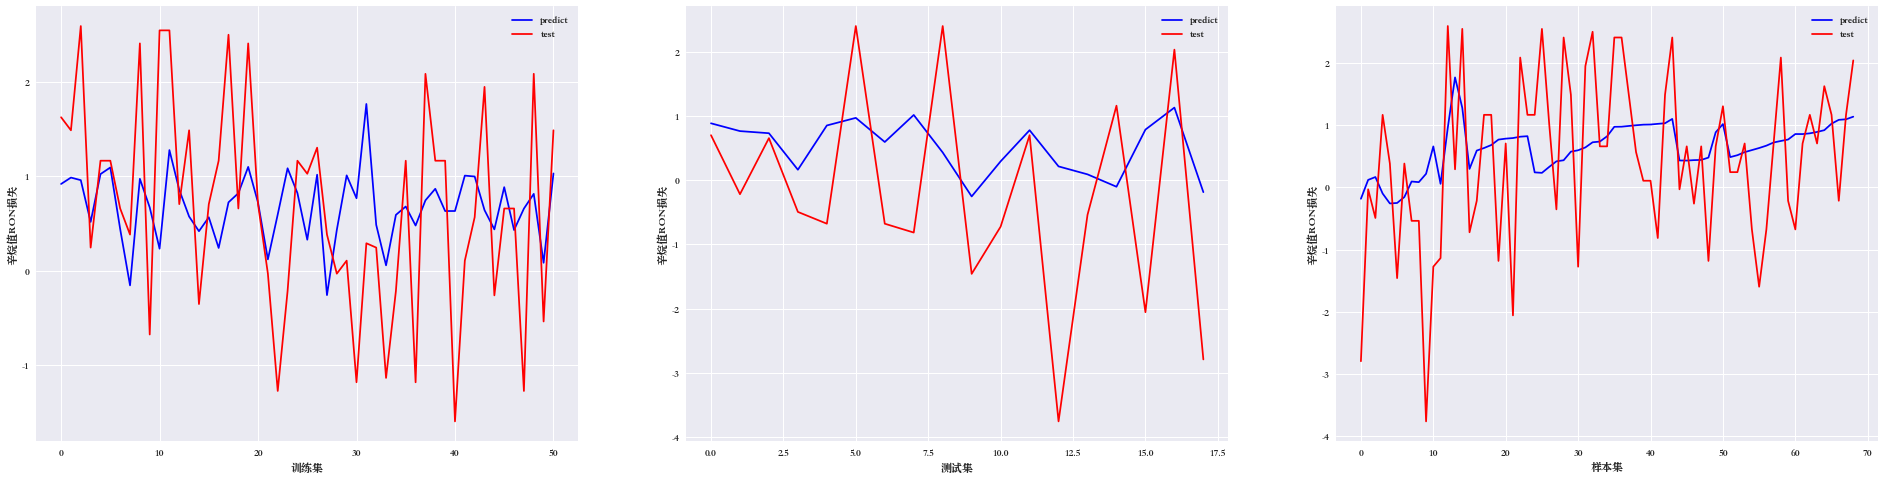

In [14]:
plt.figure(figsize = (33, 8))
plt.subplot(131)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(132)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(133)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 进行加权求和预测

In [15]:
data_1st = samples_data[model_features_1st.keys()]
data_2nd = samples_data[model_features_2nd.keys()]
data_3rd = samples_data[model_features_3rd.keys()]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]

In [16]:
y_pred = weight_1st * model_1st.predict(data_1st) + weight_2nd * model_2nd.predict(data_2nd) + weight_3rd * model_3rd.predict(data_3rd)
print ('MSE whole:%.3f' % (mean_squared_error(y, y_pred)))
print ('R^2 whole:%.3f' % (r2_score(y, y_pred)))

MSE whole:1.187
R^2 whole:-0.191


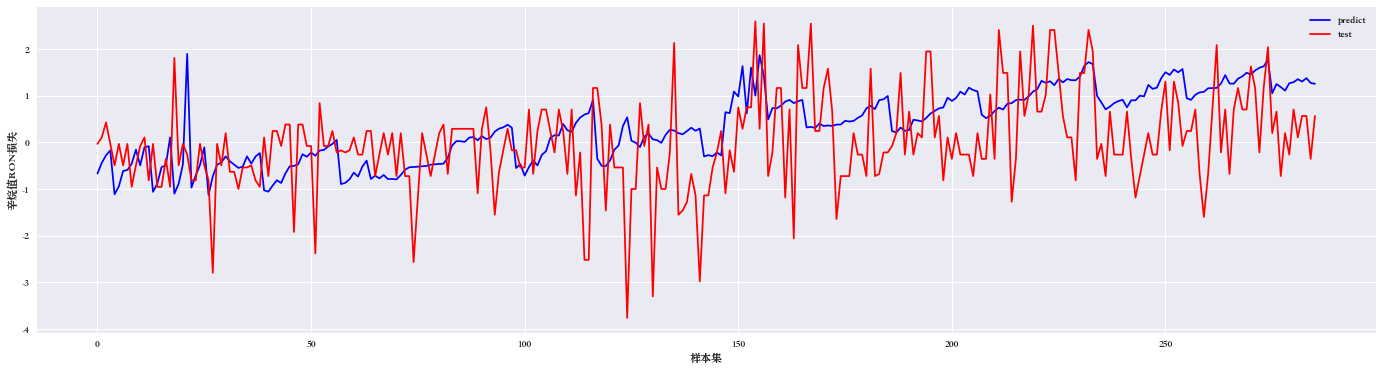

In [17]:
plt.figure(figsize = (24, 6))
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择三个模型的特征的并集

In [18]:
X = samples_data[list(set(model_features_1st.keys()).union(set(model_features_2nd.keys())).union(set(model_features_3rd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(214, 20)
y_train.shape=(214, 1)
X_test.shape=(72, 20)
y_test.shape=(72, 1)


In [19]:
# 简单线性回归
# Applying LinearRegression
model_3rd = LinearRegression()
model_3rd.fit(X_train, y_train)
y_train_pred = model_3rd.predict(X_train)
y_test_pred = model_3rd.predict(X_test)
y_pred = model_3rd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred), r2_score(y, y_pred)))

MSE train:0.826, test:0.881, whole:0.840
R^2 train:0.179, test:0.089, whole:0.157


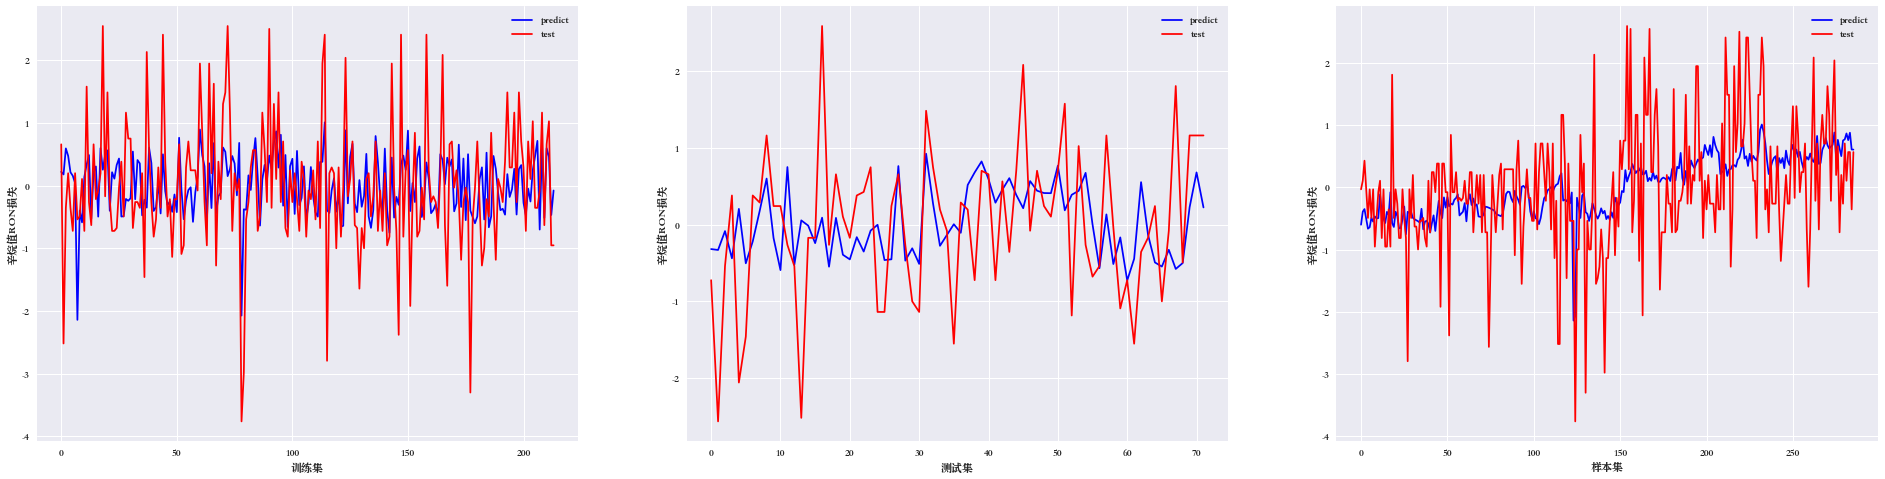

In [20]:
plt.figure(figsize = (33, 8))
plt.subplot(131)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(132)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(133)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 三个线性模型的特征的交集

In [21]:
X = samples_data[list(set(model_features_1st.keys()).intersection(set(model_features_2nd.keys())).intersection(set(model_features_3rd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(214, 2)
y_train.shape=(214, 1)
X_test.shape=(72, 2)
y_test.shape=(72, 1)


In [22]:
# 简单线性回归
# Applying LinearRegression
model_3rd = LinearRegression()
model_3rd.fit(X_train, y_train)
y_train_pred = model_3rd.predict(X_train)
y_test_pred = model_3rd.predict(X_test)
y_pred = model_3rd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred), r2_score(y, y_pred)))

MSE train:0.806, test:1.163, whole:0.896
R^2 train:0.118, test:0.049, whole:0.101


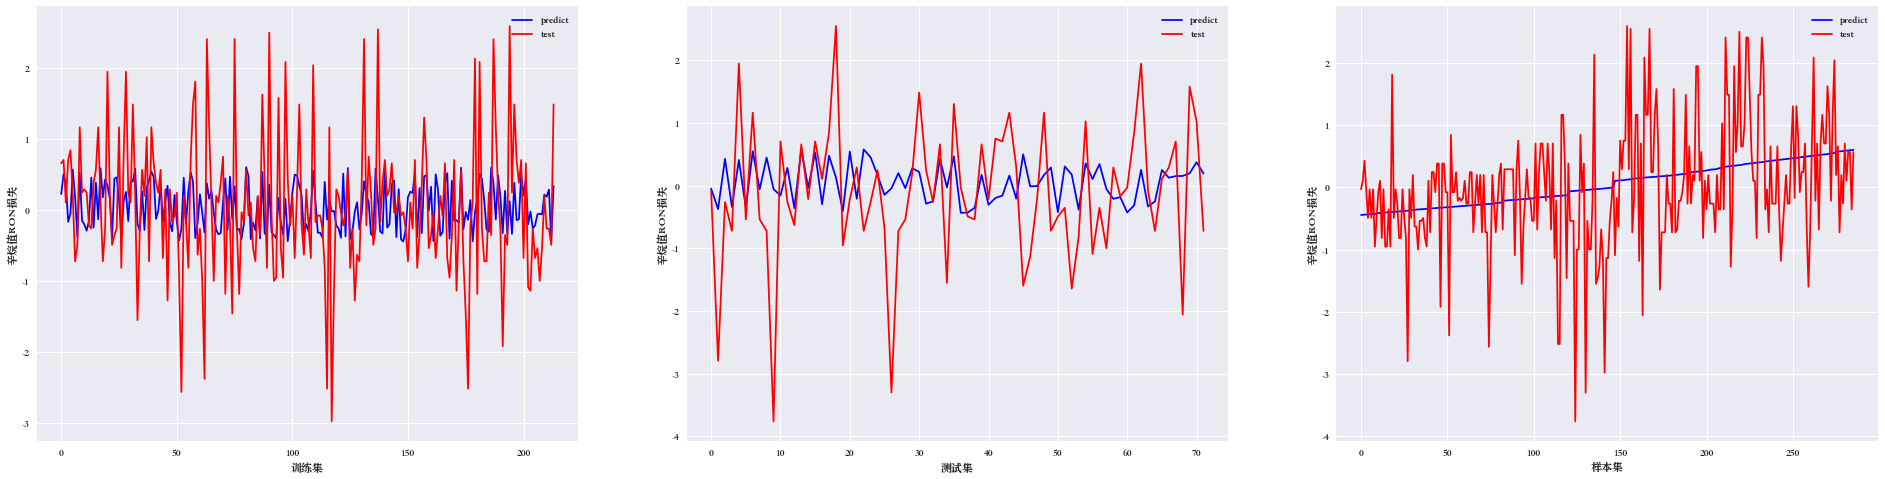

In [23]:
plt.figure(figsize = (33, 8))
plt.subplot(131)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(132)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(133)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()